### Project Description/Scenario






This project seeks to gain insight into the fundings received by start-ups companies in India between 2018 and 2021. And advice a team trying to venture into the Indian start-up ecosystem, by proposing the best course of action. This would be done by developing a unique story from this dataset, stating and testing a hypothesis, asking questions, perform analysis and share insights with relevant visualisations.

### BUSINESS UNDERSTANDING


 
Start-up funding plays a crucial role providing essential capital to nurture new ventures that drive economic growth and technological advancement.Indian startups ecosystem span across various sectors and domains, such as e-commerce, fintech, edtech, healthtech, and agritech. 


This project aims to equip the team with the knowledge and strategic insights on identifying the most promising sectors, cities, funding trends, and key players necessary to make informed decisions and successfully engage with the dynamic and rapidly evolving Indian start-up landscape.

### Data Understanding



 
The datasets contains information about startup funding from 2018 to 2021. It includes various attributes such as the company’s name, sector, funding amount, stage, investor details, and location.
 
The key attributes in the dataset include:
 
**Company/Brand**: Name of the company/start-up
 
**Founded**: Year start-up was founded
 
**Sector**: Sector of service
 
**What it does**: Description about Company
 
**Founders**: Founders of the Company
 
**Investor**: Investors
 
**Amount($)**: Raised fund
 
**Stage**: Round of funding reached
 
**Headquarters**: Location of   the start company


**Hypothesis**
 
Null Hypothesis (H0): Funding to start-ups is centralized around specific locations and sectors.
 
Alternative Hypothesis (H1): Funding to start-ups is spread across different locations and sectors.
 


 
 
**RESEARCH QUESTIONS**
 
1.How has funding to startups changed over the period of time?/What is the trend of funding amounts over the years?

2.What sectors are attracting the most investment in the Indian start-up ecosystem?

3.Which cities are the major hubs for start-ups in India?
 
4.Which headquarter is the most preferred startup location?

5.What are the most common funding stages among indian startups?


 


 ### Importing Liabries and Uploading Datasets

In [1]:
from dotenv import dotenv_values  # Import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import re
import warnings 
import pyodbc
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:
environment_variables = dotenv_values('.env')
# we are getting values from our dotenv files to extract the database,server,login and password.

database= environment_variables.get("database")
server=environment_variables.get("server")
username= environment_variables.get("username")
password= environment_variables.get("password")
#The connection string below uses the sql driver to connect the server using the credentials provided
connection_string =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [3]:
print( connection_string)

DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng


In [4]:
connection= pyodbc.connect(connection_string)
# We now connect to the sql database and find out the tables in this database
db_query ='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' '''

In [5]:
# Extracting Dataset
data = pd.read_sql(db_query, connection)
data



,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [6]:

query= "Select * from dbo.LP1_startup_funding2021"

query2= "Select * from dbo.LP1_startup_funding2020"


In [7]:
# Loading datasets

data_2021 = pd.read_sql(query, connection)
data_2020 = pd.read_sql(query2, connection)
data_2019 = pd.read_csv(r"C:\Users\Josephine\Downloads\startup_funding2019.csv")
data_2018 = pd.read_csv(r'C:\Users\Josephine\Downloads\startup_funding2018.csv')



# Data Preview

#### Exploring the 2018 Dataset

In [8]:
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [9]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [10]:
#Checking a brief description of the 2018 dataset

data_2018.describe(include="all").transpose()

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


#### Exploring the 2019 Dataset

In [11]:
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [12]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [13]:
data_2019.shape
print("The 2019 Funding data contains " ,data_2019.shape[0], "rows and " ,data_2019.shape[1], "columns")

The 2019 Funding data contains  89 rows and  9 columns


In [14]:
data_2019.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking for the number of NaN values

data_2019.isna().sum()
# There are NaN values in founded, Headquarters, Sector, Founders and Stage 

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

### Exporing the 2020 dataset

In [16]:
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [17]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [18]:
data_2020.shape
print("The 2020 Funding data contains " ,data_2020.shape[0], "rows and " ,data_2020.shape[1], "columns")

The 2020 Funding data contains  1055 rows and  10 columns


In [19]:
data_2020.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Checkng for NaN values
data_2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [21]:
# Checking for duplicated values

data_2020.duplicated().sum()
# Good, This confirms our duplicates at the description section.

3

### Exploring 2021 dataset


In [22]:
data_2021.tail(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [23]:
data_2021.shape
print("The 2021 Funding data contains " ,data_2021.shape[0], "rows and " ,data_2021.shape[1], "columns")

The 2021 Funding data contains  1209 rows and  9 columns


In [24]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [25]:
# A brief description of the data

data_2021.describe(include="all").transpose()
# Check The BharatPe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Checking for duplicated values

data_2021.duplicated().sum()

19

In [27]:
# Checking for null values
data_2021.isna().sum()
# there are null values in Founded, "Sector", "Investor","Founders" "Amount","Stage" &/ "HeadQuarter

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

## Issues identified during Exploratory Data Analysis (EDA) stage
#### Data_2018
1. Amount has datatype as object. It should be a float data type
2. There are different currencies in the Amount column. All currencies are supposed to be in dollars. 
 All commas, dashes attached to the Amounts should be removed. 
3. There are no Non-Avalaible Values(NaN) in the dataset
4. Company names mixed with website. Cell 31 =' Ideal insurance.com plus others...We may decide to leave it as it is.
5. There is a google document link in the Rounds/Series column
6. The "About" column has no influence on our analysis so hence must be removed.(Lets decide)
7. There is 1 duplicated information in the dataset(Company Name = TheCollegeFever)
8. Location column is not consistent with the rest of the dataset. It contained city, State, and Country.
9. There are locations that contain India, Asia. This will be replaced with the most recurring city.
10. Location would be changed to Headquarters to match with the rest of the datasets

#### Data_2019
1. There are lots NaN values*** in the Stage, HeadQuaters and Founded columns
2. There is the currency sign and commas attached to the amounts would be removed and have amount changed as Amount($)
3. The Founded Column is in float. No big issue.
4.  Amount column is in object.would be changed to Integer or Float
5. The Founder columnn is not important to our analysis
6. Company/Brand column must be renamed to Company_Name

#### Data_2020
1. Company/Brand column must be renamed to Company_Name
2. Column10" has no influence on the dataset
3. There is the currency sign,dashes and commas attached to the amounts.
4. There are Headquaters cities that are outside India.eg
5. Duplicated three entries (Byju’s, Nykaa, Krimanshi)
6. Columns with names of cities and state.would maintain just the city

#### Data_2021
1. Company/Brand column would be renamed to Company_Name
2. There is the currency sign and commas attached to the amounts.
4. There are lots of NaN values

#### General Additions
1. Funding_year would be added to the datasets to know which year these companies recieved funding
2. 'Founded','Founders' , 'About company' or 'what it does' Columns would be dropped 
3.  Company/Brand column would be renamed to Company_Name
4. Some columns would have their Datatype changed into the required format. 
 

## Data Cleaning And Preparation

1. All identified errors or issues in the dataset will be corrected in the cleaning process.
2. The datasets will be concactenanted into a single dataset

In [28]:
# Add the funding_year to the dataset. 
data_2020.insert (7,'funding_year',2020)
data_2021.insert (7,'funding_year',2021)
data_2019.insert (7,'funding_year',2019)
data_2018.insert (4,'funding_year',2018)

In [29]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'funding_year', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [30]:
# Changing the Company Brand to Company Name 
# Rename the 'Company_Brand' column to 'Company_Name'
data_2021.rename(columns={'Company_Brand': 'Company_Name'}, inplace=True)
data_2020.rename(columns={'Company_Brand': 'Company_Name'}, inplace=True)
data_2019.rename(columns={'Company/Brand': 'Company_Name'}, inplace=True)
data_2018.rename(columns={'Company Name' : 'Company_Name'}, inplace=True)

In [31]:
data_2020.shape

(1055, 11)

##### Renaming Columns

In [32]:
# Rename Round/Series to Stage
data_2018.rename(columns={'Round/Series': 'Stage'}, inplace=True)

# Renaming Location To Headquarters.
data_2018.rename(columns={'Location': 'HeadQuarter'}, inplace=True)

# Rename the 'About Company' column to 'What it does'
data_2018.rename(columns={'About Company': 'What_it_does'}, inplace=True)
data_2019.rename(columns={'What it does': 'What_it_does'},inplace=True)

# Renaming 'Industry' to 'Sector'
data_2018.rename(columns={'Industry': 'Sector'}, inplace=True)

# Rename the 'Amount($)'column to 'Amount' to match the other data
data_2019.rename(columns={'Amount($)': 'Amount'},inplace=True)



### Droping Columns to facilitate Merging 

In [33]:

columns_to_drop = ["Founded", "Founders"]
data_2021 = data_2021.drop(columns=columns_to_drop)
data_2020 = data_2020.drop(columns=columns_to_drop)
data_2019 = data_2019.drop(columns=columns_to_drop)
data_2020 = data_2020.drop(['column10'],axis=1)

 

#### Cleaning Data 2018 throughouly

#### 'Amount'


In [34]:
# Cleaning up symbols to get a float
data_2018["Amount"].replace(",", "", regex=True, inplace=True)
data_2018["Amount"].replace("$", "", regex=True, inplace=True)
data_2018["Amount"].replace("—", 0, regex=True, inplace=True)

#### Converting Indian Rupees to Dollars

A conversion rate of 1 Indian Rupee to US Dollars was used. 1 Indian rupee (INR) was equal to approximately 0.015 US dollars (USD) in 2018. Therefore, to convert 1 INR to USD in 2018, we would multiply amount in Rupees by 0.015 to get the equivalent value of 0.015 USD..


In [35]:
rate= 0.015
data_2018['INR Amount'] = data_2018['Amount'].str.split('₹').str[1]
#data_2018["INR Amount"].head()

data_2018['INR Amount'] = data_2018['INR Amount'].apply(float).fillna(0)

data_2018['USD Amount'] = data_2018['INR Amount'] * 0.015

data_2018['USD Amount'] = data_2018['USD Amount'].replace(0, np.nan)

data_2018['USD Amount'] = data_2018['USD Amount'].fillna(data_2018['Amount'])

data_2018["Amount"] = data_2018["USD Amount"].apply(lambda x: float(str(x).replace("$","")))
data_2018[["Amount"]].head(10)


,Amount
0,250000.0
1,600000.0
2,975000.0
3,2000000.0
4,0.0
5,1600000.0
6,240000.0
7,750000.0
8,0.0
9,0.0


In [36]:
# Dropping new columns that were used in the computation

data_2018.drop(["INR Amount", "USD Amount"], axis=1, inplace=True)

### Merging Datasets

In [37]:
data_combined = pd.concat([data_2021, data_2020, data_2019,data_2018], ignore_index=True)
data_combined.head(5)

,Company_Name,HeadQuarter,Sector,What_it_does,Investor,funding_year,Amount,Stage
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"BEENEXT, Entrepreneur First",2021,"$1,200,000",Pre-series A
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Unilazer Ventures, IIFL Asset Management",2021,"$120,000,000",None
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"GSV Ventures, Westbridge Capital",2021,"$30,000,000",Series D
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"CDC Group, IDG Capital",2021,"$51,000,000",Series C
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2021,"$2,000,000",Seed


In [38]:
data_combined[data_combined.duplicated()]

,Company_Name,HeadQuarter,Sector,What_it_does,Investor,funding_year,Amount,Stage
107,Curefoods,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,"Iron Pillar, Nordstar, Binny Bansal",2021,$13000000,None
109,Bewakoof,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,InvestCorp,2021,$8000000,None
111,FanPlay,Computer Games,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",2021,Upsparks,$1200000
117,Advantage Club,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Y Combinator, Broom Ventures, Kunal Shah",2021,$1700000,None
119,Ruptok,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Eclear Leasing,2021,$1000000,None
243,Trinkerr,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,Accel India,2021,$6600000,Series A
244,Zorro,Gurugram,Social network,Pseudonymous social network platform,"Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",2021,$32000000,Seed
245,Ultraviolette,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"TVS Motor, Zoho",2021,$150000000,Series C
246,NephroPlus,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,IIFL Asset Management,2021,$24000000,Series E
247,Unremot,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Inflection Point Ventures,2021,$700000,Seed


In [39]:
data_combined = data_combined.drop_duplicates(subset=None, keep="first")

In [40]:
data_combined.isna().sum()

Company_Name      0
HeadQuarter     114
Sector           18
What_it_does      0
Investor        624
funding_year      0
Amount          256
Stage           929
dtype: int64

In [41]:
# Cross checking for duplicates
data_combined.duplicated().any()

False

#### Cleaning Columns

#### Amount

In [42]:
#### Take off special symbols("," and "$") from amount
data_combined["Amount"] = data_combined["Amount"].apply(lambda x: str(x).replace(",", ""))
data_combined["Amount"] = data_combined["Amount"].apply(lambda x: str(x).replace("$", ""))
data_combined["Amount"] = data_combined["Amount"].apply(lambda x: str(x).replace("$", ""))


In [43]:
# Renaming the Amount coulumn as "Amount($)"
data_combined.rename(columns={'Amount': 'Amount($)'},inplace=True)

In [44]:
pd.set_option('display.max_rows', None)
data_combined["Amount($)"]

0                              1200000
1                            120000000
2                             30000000
3                             51000000
4                              2000000
5                            188000000
6                               200000
7                          Undisclosed
8                          Undisclosed
9                              1000000
10                             3000000
11                              100000
12                              700000
13                             2000000
14                             9000000
15                            40000000
16                            49000000
17                              400000
18                              300000
19                            25000000
20                           160000000
21                         Undisclosed
22                              150000
23                             1800000
24                             5000000
25                       

In [45]:
data_combined["Amount($)"]
filtered_data =data_combined[data_combined["Amount($)"] == 'Undisclosed'].shape[0]
filtered_data


127

In [46]:
total_count = data_combined["Amount($)"].shape[0]
total_count


2855

In [47]:
# Calculate the percentage of 'Undisclosed' values
percentage_undisclosed = (filtered_data / total_count) * 100
percentage_undisclosed


4.448336252189142

Looking at the number of undisclosed funding amounts in the Amount column being about just 4.4% of the entire column count. We would replace these values with '0' In order that the amount column be changed into a float  

In [48]:
# Replacing Undiscolsed amounts with 0
data_combined["Amount($)"]=data_combined["Amount($)"].str.replace("Undisclosed",'', regex=True)
data_combined["Amount($)"]=data_combined["Amount($)"].str.replace("undisclosed",'', regex=True)
data_combined["Amount($)"]=data_combined["Amount($)"].str.replace("None",'', regex=True)

In [49]:
data_combined[data_combined["Amount($)"] == 'None'].shape[0]

0

In [50]:
data_combined.iloc[[1191]]

,Company_Name,HeadQuarter,Sector,What_it_does,Investor,funding_year,Amount($),Stage
1211,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Venture Center,2020,nan,Pre-seed


In [51]:

# Define the list of unique values to replace with NaN
unique_values = ["nan",'Upsparks', 'Series C', 'Seed','ah! Ventures','Pre-series A','ITO Angel Network LetsVenture','JITO Angel Network LetsVenture']
# Positions(98,111,551,667)
# Replace the unique values with NaN
data_combined['Amount($)'] = data_combined['Amount($)'].replace(unique_values, np.nan)

In [52]:
data_combined[data_combined['Amount($)']=="nan"].count()

Company_Name    0
HeadQuarter     0
Sector          0
What_it_does    0
Investor        0
funding_year    0
Amount($)       0
Stage           0
dtype: int64

In [53]:
data_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  2855 non-null   object
 1   HeadQuarter   2741 non-null   object
 2   Sector        2837 non-null   object
 3   What_it_does  2855 non-null   object
 4   Investor      2231 non-null   object
 5   funding_year  2855 non-null   int64 
 6   Amount($)     2594 non-null   object
 7   Stage         1926 non-null   object
dtypes: int64(1), object(7)
memory usage: 200.7+ KB


In [54]:
data_combined["Amount($)"]=pd.to_numeric(data_combined["Amount($)"])
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2855 non-null   object 
 1   HeadQuarter   2741 non-null   object 
 2   Sector        2837 non-null   object 
 3   What_it_does  2855 non-null   object 
 4   Investor      2231 non-null   object 
 5   funding_year  2855 non-null   int64  
 6   Amount($)     2440 non-null   float64
 7   Stage         1926 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 200.7+ KB


In [55]:
data_combined["Amount($)"]=data_combined["Amount($)"].fillna(0)
data_combined.isna().sum()

Company_Name      0
HeadQuarter     114
Sector           18
What_it_does      0
Investor        624
funding_year      0
Amount($)         0
Stage           929
dtype: int64

In [56]:
data_combined[data_combined['Amount($)']==0].count()

Company_Name    563
HeadQuarter     543
Sector          561
What_it_does    563
Investor        397
funding_year    563
Amount($)       563
Stage           342
dtype: int64

#### Cleaning The HeadQuarter Column


In [57]:
pd.set_option('display.max_rows', None)
data_combined["HeadQuarter"]

0                                               Bangalore
1                                                  Mumbai
2                                                  Mumbai
3                                                  Mumbai
4                                                Gurugram
5                                               New Delhi
6                                               Bangalore
7                                                  Mumbai
8                                               Bangalore
9                                                  Mumbai
10                                                 Mumbai
11                                              New Delhi
12                                              Bangalore
13                                              Hyderabad
14                                                 Jaipur
15                                              Bangalore
16                                              New Delhi
17            

In [58]:
#Cleaning up Headquarters to have the cities only
 
data_combined["HeadQuarter"]=data_combined['HeadQuarter'].str.split(',').str[0]
data_combined['HeadQuarter'].tail(30)


2849    Bangalore
2850    Bengaluru
2851       Mumbai
2852       Mumbai
2853         Pune
2854      Gurgaon
2855       Mumbai
2856      Chennai
2857       Mumbai
2858         Pune
2859    Bangalore
2860       Mumbai
2861    New Delhi
2862       Mumbai
2863    Bengaluru
2864       Mumbai
2865       Jaipur
2866       Mumbai
2867    New Delhi
2868         Pune
2869    New Delhi
2870    Bengaluru
2871    Ghaziabad
2872    Bangalore
2873    Bengaluru
2874    Bangalore
2875      Haryana
2876       Mumbai
2877       Mumbai
2878      Chennai
Name: HeadQuarter, dtype: object

In [59]:
# Replace City names with the right names
data_combined["HeadQuarter"] = data_combined['HeadQuarter'].replace("Bangalore", "Bengaluru")
data_combined["HeadQuarter"] = data_combined['HeadQuarter'].replace("Haryana", "Chandigarh")
data_combined["HeadQuarter"] = data_combined['HeadQuarter'].replace("Uttar Pradesh", "Noida")
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].replace('\t#REF!','')
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].replace('Food & Beverages','New Delhi')
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].replace('Pharmaceuticals','Mumbai') 
data_combined["HeadQuarter"] = data_combined['HeadQuarter'].replace("Computer Games",'Hyderabad')


In [60]:

# List of cities that are not located in India
non_indian_cities = [
    "Singapore", "Frisco", "California", "New York", "San Francisco", "San Ramon",
    "Paris", "Plano", "Sydney", "San Francisco Bay Area", "Bangaldesh", "London",
    "Milano", "Palmwoods", "France", "Irvine", "Newcastle Upon Tyne", "Shanghai",
    "Jiaxing", "San Franciscao", "Tangerang", "Berlin", "Seattle", "Riyadh", "Seoul",
    "Bangkok","Beijing", "Santra", "Mountain View", "Information Technology & Services"
]

# Filter the dataframe to exclude rows with cities that do not belong
data_combined = data_combined[~data_combined['HeadQuarter'].isin(non_indian_cities)]


In [61]:
data_combined[['HeadQuarter']].isna().sum()

HeadQuarter    114
dtype: int64

In [62]:
# Impute missing values in the Location column with Unknown
data_combined['HeadQuarter'].fillna('Unknown', inplace=True)


#### Cleaning Stage Column



#### Fill NaN values with "Undisclosed"

- Change column casing
- Remove row with link
- Fill nulls with "Undisclosed"

In [63]:
#data_combined['Stage'] = data_combined['Stage'].fillna("Undisclosed")
data_combined['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Pre-series C', 'Series B2', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Mid series',
       'Series C, D', 'Seed funding', nan, 'Fresh funding',
       'Post series A', 'Seed fund', 'Series B+', 'Angel',
       'Private Equity', 'Venture - Series Unkn

In [64]:
data_combined["Stage"] = data_combined["Stage"].str.replace("$", "")

In [65]:
# Change the case of all rows in the "Funding Stage" column to proper case
data_combined['Stage'] = data_combined['Stage'].str.title()

# Drop rows by index
data_combined = data_combined.drop(index=[98, 677, 674, 538, 551])

# Change the case of all rows in the "Stage" column to proper case
data_combined['Stage'] = data_combined['Stage'].str.title()

# URL to be removed
unwanted_url = 'Https://Docs.Google.Com/Spreadsheets/D/1X9Zineaz6Aunchihnmi8U6Ks7Kntr3Byy_Ybgfqaoua/Edit#Gid=1861303593'

# Remove the rows with the unwanted URL in the 'stage' column
data_combined = data_combined[data_combined['Stage'] != unwanted_url]


# Fill all null values with "Undisclosed"
data_combined['Stage']= data_combined['Stage'].fillna('Undisclosed')

# Print
print("Null values in Stage:",data_combined['Stage'].isna().sum())

Null values in Stage: 0


Categorize Funding stages to their correct names

In [66]:


# Function to categorize the Funding Stage 
def stage_correction(Stage):
    if re.search(r'Angel|Angel Round', Stage, re.IGNORECASE):
        return 'Angel'
    elif re.search(r'Bridge|Bridge Round', Stage, re.IGNORECASE):
        return 'Bridge'
    elif re.search(r'Debt|Debt Financing', Stage, re.IGNORECASE):
        return 'Debt Financing'
    elif re.search(r'Fresh Funding|Funding Round', Stage, re.IGNORECASE):
        return 'Funding Round'
    elif re.search(r'Pre Seed Round|Pre-Seed|Pre-Seed Round', Stage, re.IGNORECASE):
        return 'Pre-Seed'
    elif re.search(r'Pre Series A|Pre- Series A|Pre-Series|Pre-Series A|Pre-Series A1', Stage, re.IGNORECASE):
        return 'Pre-Series A'
    elif re.search(r'Pre Series B|Pre-Series B', Stage, re.IGNORECASE):
        return 'Pre-Series B'
    elif re.search(r'Seed|Seed A|Seed Fund|Seed Funding|Seed Investment|Seed Round', Stage, re.IGNORECASE):
        return 'Seed Round'
    elif re.search(r'Pre Series C|Pre-Series C|Series C, D' , Stage, re.IGNORECASE):
        return 'Pre-Series C'
    elif re.search(r'Series A|Series A-1', Stage, re.IGNORECASE):
        return 'Series A'
    elif re.search(r'Series B|Series B+', Stage, re.IGNORECASE):
        return 'Series B'
    elif re.search(r'Series D|Series D1', Stage, re.IGNORECASE):
        return 'Series D'
    else:
        return Stage
    
# Apply the function to update the 'Stage' column
data_combined['Stage'] = data_combined['Stage'].apply(stage_correction)

# Find unique values in the "Stage" column
unique= data_combined["Stage"].unique()

# Check for number of unique values in the "Stage"  column
print(f"Number of unique Stages: {len(unique)}")     

Number of unique Stages: 33


#### Cleaning The Sector Column


- Replace "—" with nulls,then
- Fill the nulls using the column "What_it_does" as reference
- Extract only one Sector from the 'Sector' column
- Categorize all Sectors into Major Industries/Sectors

In [68]:
# Replace "—" with Nulls
data_combined['Sector'] = data_combined['Sector'].replace('—', np.nan)


In [69]:
# Mapping of company names to industries
company_to_sector = {
    "VMate": "Media and Entertainment",
    "Awign Enterprises": "Services (Human Resources)",
    "TapChief": "Services (Consulting / Professional Services)",
    "KredX": "Financial Services",
    "m.Paani": "E-Commerce",
    "Text Mercato": "E-Commerce",
    "Magicpin": "E-Commerce",
	"Leap Club": "E-Commerce",
	"Juicy Chemistry": "Services",
	"Servify": "Retail",
	"Wagonfly": "Media and Entertainment",
	"DrinkPrime": "E-Commerce",
	"Kitchens Centre": "Consumer Durables",
	"Innoviti": "Services",
	"Brick&Bolt": "Financial Services",
	"Toddle": "Real Estate",
	"HaikuJAM": "IT & BPM",
    "MissMalini Entertainment" : "Entertainment and Media",
    "Jagaran Microfin" : "Microfinance",
    "FLEECA" : "Automotive Services",
    "WheelsEMI" : "Financial Services",
    "Fric Bergen" : "Food and Beverage",
    "Deftouch" : "Gaming",
    "Corefactors" : "Marketing",
    "Cell Propulsion" : "Transportation Technology",
    "Flathalt" : "Real Estate",
    "dishq" : "Food Technology",
    "Trell" : "Social Networking",
    "HousingMan.com" : "Real Estate",
    "Steradian Semiconductors" : "Semiconductor Technology",
    "SaffronStays" : "Travel and Hospitality",
    "Inner Being Wellness" : "Beauty and Wellness",
    "MySEODoc" : "Digital Marketing",
    "ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED" : "Digital Marketing",
    "Scale Labs" : "E-commerce Solutions",
    "Roadcast" : "Business Services",
    "Toffee" : "Insurance Technology",
    "ORO Wealth" : "Financial Services",
    "Finwego" : "Financial Services",
    "Cred" : "Financial Services",
    "Origo" : "Agriculture",
    "Sequretek" : "Cyber Security",
    "Avenues Payments India Pvt. Ltd." : "IT Solutions",
    "Planet11 eCommerce Solutions India (Avenue11)" : "Technology",
    "Iba Halal Care" : "Cosmetics",
    "Togedr" : "Activity Discovery and Booking",
    "Scholify" : "Edutech"    
}

# Function to fill missing sectors based on company name
def fill_industry(row):
    if pd.isna(row["Sector"]):
        return company_to_sector.get(row["Company_Name"], row["Sector"])
    return row["Sector"]

# Apply the function to update the 'Sector' column
data_combined["Sector"] = data_combined.apply(fill_industry, axis=1)

# Checking the Null value in the 'Sector' column
print("Null values after cleaning:",data_combined['Sector'].isna().sum())   

Null values after cleaning: 0


Extracting only one Sector from the 'Sector' column because some sectors contain multiple

In [70]:
# Function to extract the first Sector from the 'Sector' column since some companies have multiple sectors
def industry_extract(row):
    industries = row['Sector'].split(',')
    return industries[0].strip() if len(industries) > 1 else row['Sector']

# Apply the function to update the 'Sector' column
data_combined['new_sector'] = data_combined.apply(industry_extract, axis=1)
    
# Remove "Sector"
data_combined = data_combined.drop(columns=['Sector'])

# Rename "new_sector" to "Sector"
data_combined = data_combined.rename(columns={'new_sector': 'Sector'})

data_combined[["Sector"]].head()

,Sector
0,AI startup
1,EdTech
2,EdTech
3,B2B E-commerce
4,FinTech


Categorize all Sectors into Major Sectors

In [71]:
# Import re library to work with regular expressions 
import re

# Function to categorize the industries into major ones
def sector_redistribution(Sector):
    if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|microfinance|lending|wealth|insurance|mutual fund|funding|invest|neo-bank|online financial service|escrow', Sector, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'e-?commerce|retail|marketplace|e-store|e-tail|e-tailer|consumer|durables|appliances|electronics', Sector, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'marketing|advertising|brand|digital marketing|sales|customer loyalty|creative agency|content management', Sector, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'agriculture|agtech|agr[iy]tech|food|beverage|catering|cooking|dairy|nutrition|soil', Sector, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'health|medical|biotech|pharma|medtech|care|diagnostics|wellness|fitness|personal care|skincare|mental health|life science|alternative medicine|veterinary', Sector, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'transport|automotive|vehicle|logistics|delivery|air transport|mobility|car|bike|EV|auto-tech|transportation',Sector, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|interior|housing|home decor|commercial real estate|co-?working|co-?living', Sector, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'media|entertainment|broadcasting|streaming|video|music|gaming|sports|digital entertainment|visual media', Sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'education|e-?learning|edtech|training|continuing education|career planning|edutech', Sector, re.IGNORECASE):
        return 'Education'
    elif re.search(r'renewable|clean energy|solar|environmental|energy|cleantech|sanitation', Sector, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'consulting|business services|professional services|customer service|legal|facility|IT & BPM', Sector, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'information technology|IT|tech|technology|cloud|internet of things|iot|big data|saas|cyber security|software|ai|machine learning|robotics|deep tech|data science|api|digital|platform|networking|smart cities', Sector, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'consumer goods|consumer applications|consumer durables|consumer electronics|consumer appliances|eyewear|jewellery|fashion', Sector, re.IGNORECASE):
        return 'Consumer Goods'
    elif re.search(r'industrial|manufacturing|automation|industrial automation|packaging', Sector, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    else:
        return Sector
    
# Apply the function to update the 'Sector' column
data_combined['Sector'] = data_combined["Sector"].apply(sector_redistribution)

# Find unique values in the "Sector" column
unique2= data_combined["Sector"].unique()

# Check for number of unique values in the "Sector" column
print(f"Number of unique Sectors: {len(unique2)}")       # Unique values changes from 425 to 108


Number of unique Sectors: 169


Since the unique sectors are over 120,sector redistribution is done to reduce the total number and have some sectors placed in their right category. 

In [72]:

def sector2_redistribution(Sector):
    if re.search(r'technology|computer|embedded systems|AR/VR|aero|aerospace|battery', Sector, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'fintech|finance|mobile payments|fraud detection|taxation', Sector, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'agriculture|farming|craft beer|dietary supplements|QSR|biomaterial', Sector, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'e-?commerce|retail|marketplace|social commerce|online portals|online games|classifieds|news', Sector, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'healthcare|dental|hygiene|wellness|WL & RAC protection', Sector, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'media|entertainment|audio|games|reading apps|dating', Sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'transportation|mobility|automobile|automobiles',Sector, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|rental|warehouse|accommodation|home design', Sector, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'energy|environment|battery', Sector, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'marketing|advertising|market research|content marketplace', Sector, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'apps|scanning app|reading apps|dating app',Sector, re.IGNORECASE):
        return 'Apps'
    elif re.search(r'professional services|consultancy|collaboration|service industry', Sector, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'industrial|manufacturing|biomaterial', Sector, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    elif re.search(r'artificial intelligence|data analytics|data intelligence|analytics|business intelligence', Sector, re.IGNORECASE):
        return 'Artificial Intelligence'
    elif re.search(r'cosmetics|beauty', Sector, re.IGNORECASE):
        return 'Cosmetics'
    elif re.search(r'internet|search engine|job portal',Sector, re.IGNORECASE):
        return 'Internet'
    elif re.search(r'travel|tourism|business travel',Sector, re.IGNORECASE):
        return 'Travel'
    elif re.search(r'human resources|HR|work fulfillment',Sector, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'education', Sector, re.IGNORECASE):
        return 'Education'
    else:
        return Sector
    
# Apply the function to update the 'Sector' column
data_combined['Sector'] = data_combined["Sector"].apply(sector2_redistribution)

# Find unique values in the "Sector" column
unique3 = data_combined["Sector"].unique()

# Check for number of unique values in the "Sector" column
print(f"Number of unique Industries: {len(unique3)}")


Number of unique Industries: 106


In [73]:
data_combined[['Sector']].head(10)

,Sector
0,Technology
1,Education
2,Education
3,E-Commerce and Retail
4,Finance and FinTech
5,Home services
6,Healthcare and Wellness
7,Healthcare and Wellness
8,Technology
9,E-Commerce and Retail


###  Cleaning The Investor Column


In [74]:
data_combined['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [75]:
# Fill nulls with "Unknown"
data_combined['Investor']= data_combined['Investor'].fillna("Undisclosed")


data_combined.head()

,Company_Name,HeadQuarter,What_it_does,Investor,funding_year,Amount($),Stage,Sector
0,Unbox Robotics,Bengaluru,Unbox Robotics builds on-demand AI-driven ware...,"BEENEXT, Entrepreneur First",2021,1200000.0,Pre-Series A,Technology
1,upGrad,Mumbai,UpGrad is an online higher education platform.,"Unilazer Ventures, IIFL Asset Management",2021,120000000.0,Undisclosed,Education
2,Lead School,Mumbai,LEAD School offers technology based school tra...,"GSV Ventures, Westbridge Capital",2021,30000000.0,Series D,Education
3,Bizongo,Mumbai,Bizongo is a business-to-business online marke...,"CDC Group, IDG Capital",2021,51000000.0,Series C,E-Commerce and Retail
4,FypMoney,Gurugram,"FypMoney is Digital NEO Bank for Teenagers, em...","Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2021,2000000.0,Seed Round,Finance and FinTech


#### Removing Duplicates

#### Special note on Duplicates

During the data understanding phase, the team already investigated and analyzed the duplicated entries.

In [76]:
data_combined.isna().sum()

Company_Name    0
HeadQuarter     0
What_it_does    0
Investor        0
funding_year    0
Amount($)       0
Stage           0
Sector          0
dtype: int64

### Hypothesis Testing

In [77]:
# Strip all columns of spaces and converting them to category
data_combined['Company_Name'] = data_combined['Company_Name'].str.strip().astype('category')
data_combined['Stage'] = data_combined['Stage'].str.strip().astype('category')
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].str.strip().astype('category')
data_combined['Sector'] = data_combined['Sector'].str.strip().astype('category')
data_combined['Investor'] = data_combined['Investor'].str.strip().astype('category')


# Replace spaces in column names with "_"
data_combined.columns = data_combined.columns.str.replace(' ', '_')


In [78]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming data_combined is your DataFrame

# Ensure the column names are consistent
data_combined.columns = [col.strip() for col in data_combined.columns]  # Strip any leading/trailing whitespace
data_combined.rename(columns=lambda x: x.replace('($)', '').replace('$', '').strip(), inplace=True)  # Remove '$' and '($)'

# Drop rows with NaN values in 'HeadQuarter' or 'Amount'
#data_combined = data_combined.dropna(subset=['HeadQuarter', 'Amount'])


# Group by HeadQuarter and get the funding amounts
funding_groups = [group['Amount'].values for name, group in data_combined.groupby('HeadQuarter')]

# Perform ANOVA
anova_result = f_oneway(*funding_groups)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret the results
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in funding amounts across different headquarters.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding amounts across different headquarters.")


ANOVA result: F-statistic = 0.0900047130616915, p-value = 0.9999999999999999
Fail to reject the null hypothesis: No significant difference in funding amounts across different headquarters.


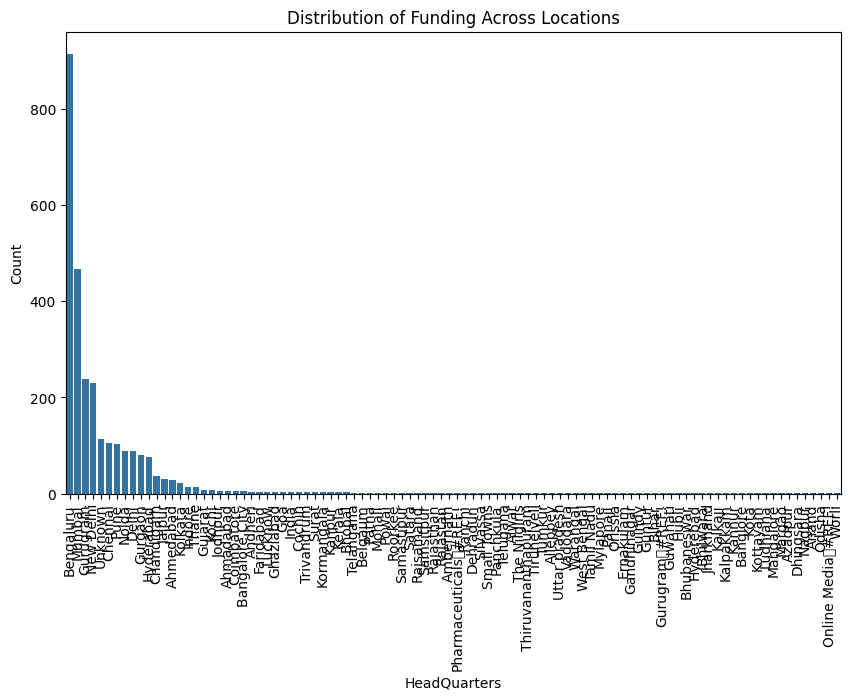

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data_combined is the DataFrame being used
data = data_combined

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HeadQuarter', order=data['HeadQuarter'].value_counts().index,)
plt.title('Distribution of Funding Across Locations')
plt.xlabel('HeadQuarters')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


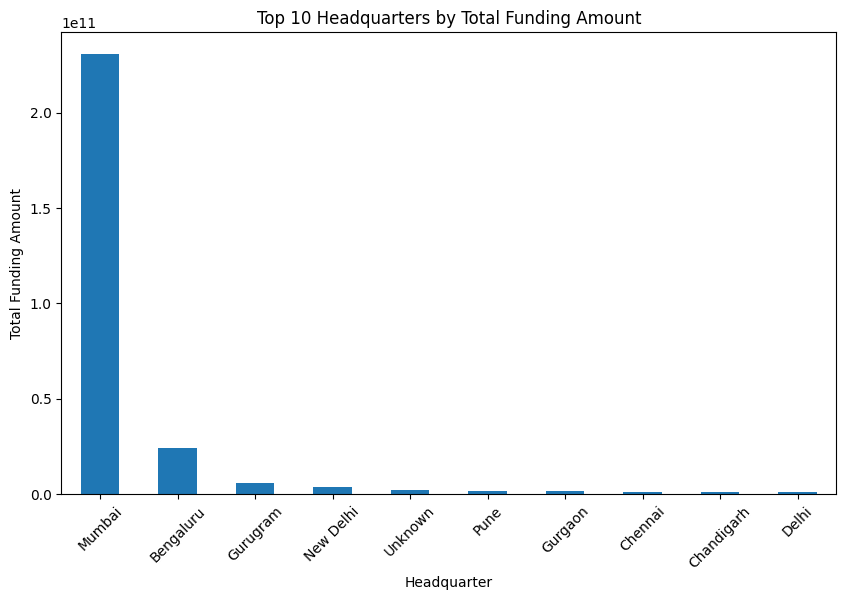

In [80]:
top_headquarters = data_combined.groupby('HeadQuarter')['Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_headquarters.plot(kind='bar')
plt.title('Top 10 Headquarters by Total Funding Amount')
plt.xlabel('Headquarter')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()



# Data Visualization


In [81]:
print("Total number of startups funded for the period is " ,data_combined["Company_Name"].count())

Total number of startups funded for the period is  2799


In [82]:
print("Total funding for the period is US$" , data_combined["Amount"].sum())

Total funding for the period is US$ 274902022945.0


## Q1
What are the trends and patterns in funding amounts for startups in India over the years?

In [83]:
# Group companies that were funded by years
years_of_funding= data_combined[data_combined["Amount"]>0].groupby(by="funding_year").Amount.count()
years_of_funding

funding_year
2018     376
2019      77
2020     760
2021    1034
Name: Amount, dtype: int64

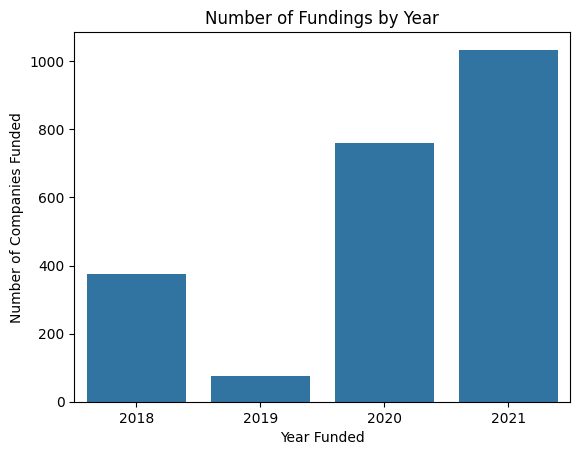

In [84]:
# Reset index to convert Series to DataFrame for plotting
years_of_funding = years_of_funding.reset_index()
# Plot horizontal bar chart
sns.barplot(x='funding_year', y='Amount', data=years_of_funding)
plt.xlabel('Year Funded')
plt.ylabel('Number of Companies Funded')
plt.title('Number of Fundings by Year')

plt.show()

## Q2. What Sectors are attracting the most Investors in the Indian ecosystem?

In [85]:
#  Visalizing the top 5 sectors most funded start up
# Calculate the total sum of fundings for each Sector
top_5_sectors_sum= data_combined.groupby(by= "Sector")[["Amount"]].sum()
top_5_sectors_sum_sorted= top_5_sectors_sum.sort_values(by= "Amount", ascending=False).head(5)

print(f"Top 5 Highly funded Sectors:\n", top_5_sectors_sum_sorted)

#----------Calculate for Overall count#----------
# Find the top 5 industries that received most funding across the years
industry_grouped= data_combined.groupby(by= "Sector")[["Company_Name"]]

# Calculate the count of the industries
top_5_sectors_count= industry_grouped.count().sort_values(by= "Company_Name", ascending=False).head(5)

print(f"\nTop 5 most funded Sectors:\n", top_5_sectors_count)

Top 5 Highly funded Sectors:
                                    Amount
Sector                                   
Finance and FinTech          1.581662e+11
E-Commerce and Retail        7.520835e+10
Technology                   6.922725e+09
Education                    5.800753e+09
Transportation and Mobility  5.363517e+09

Top 5 most funded Sectors:
                          Company_Name
Sector                               
Technology                        485
Finance and FinTech               369
Healthcare and Wellness           283
Education                         280
E-Commerce and Retail             246


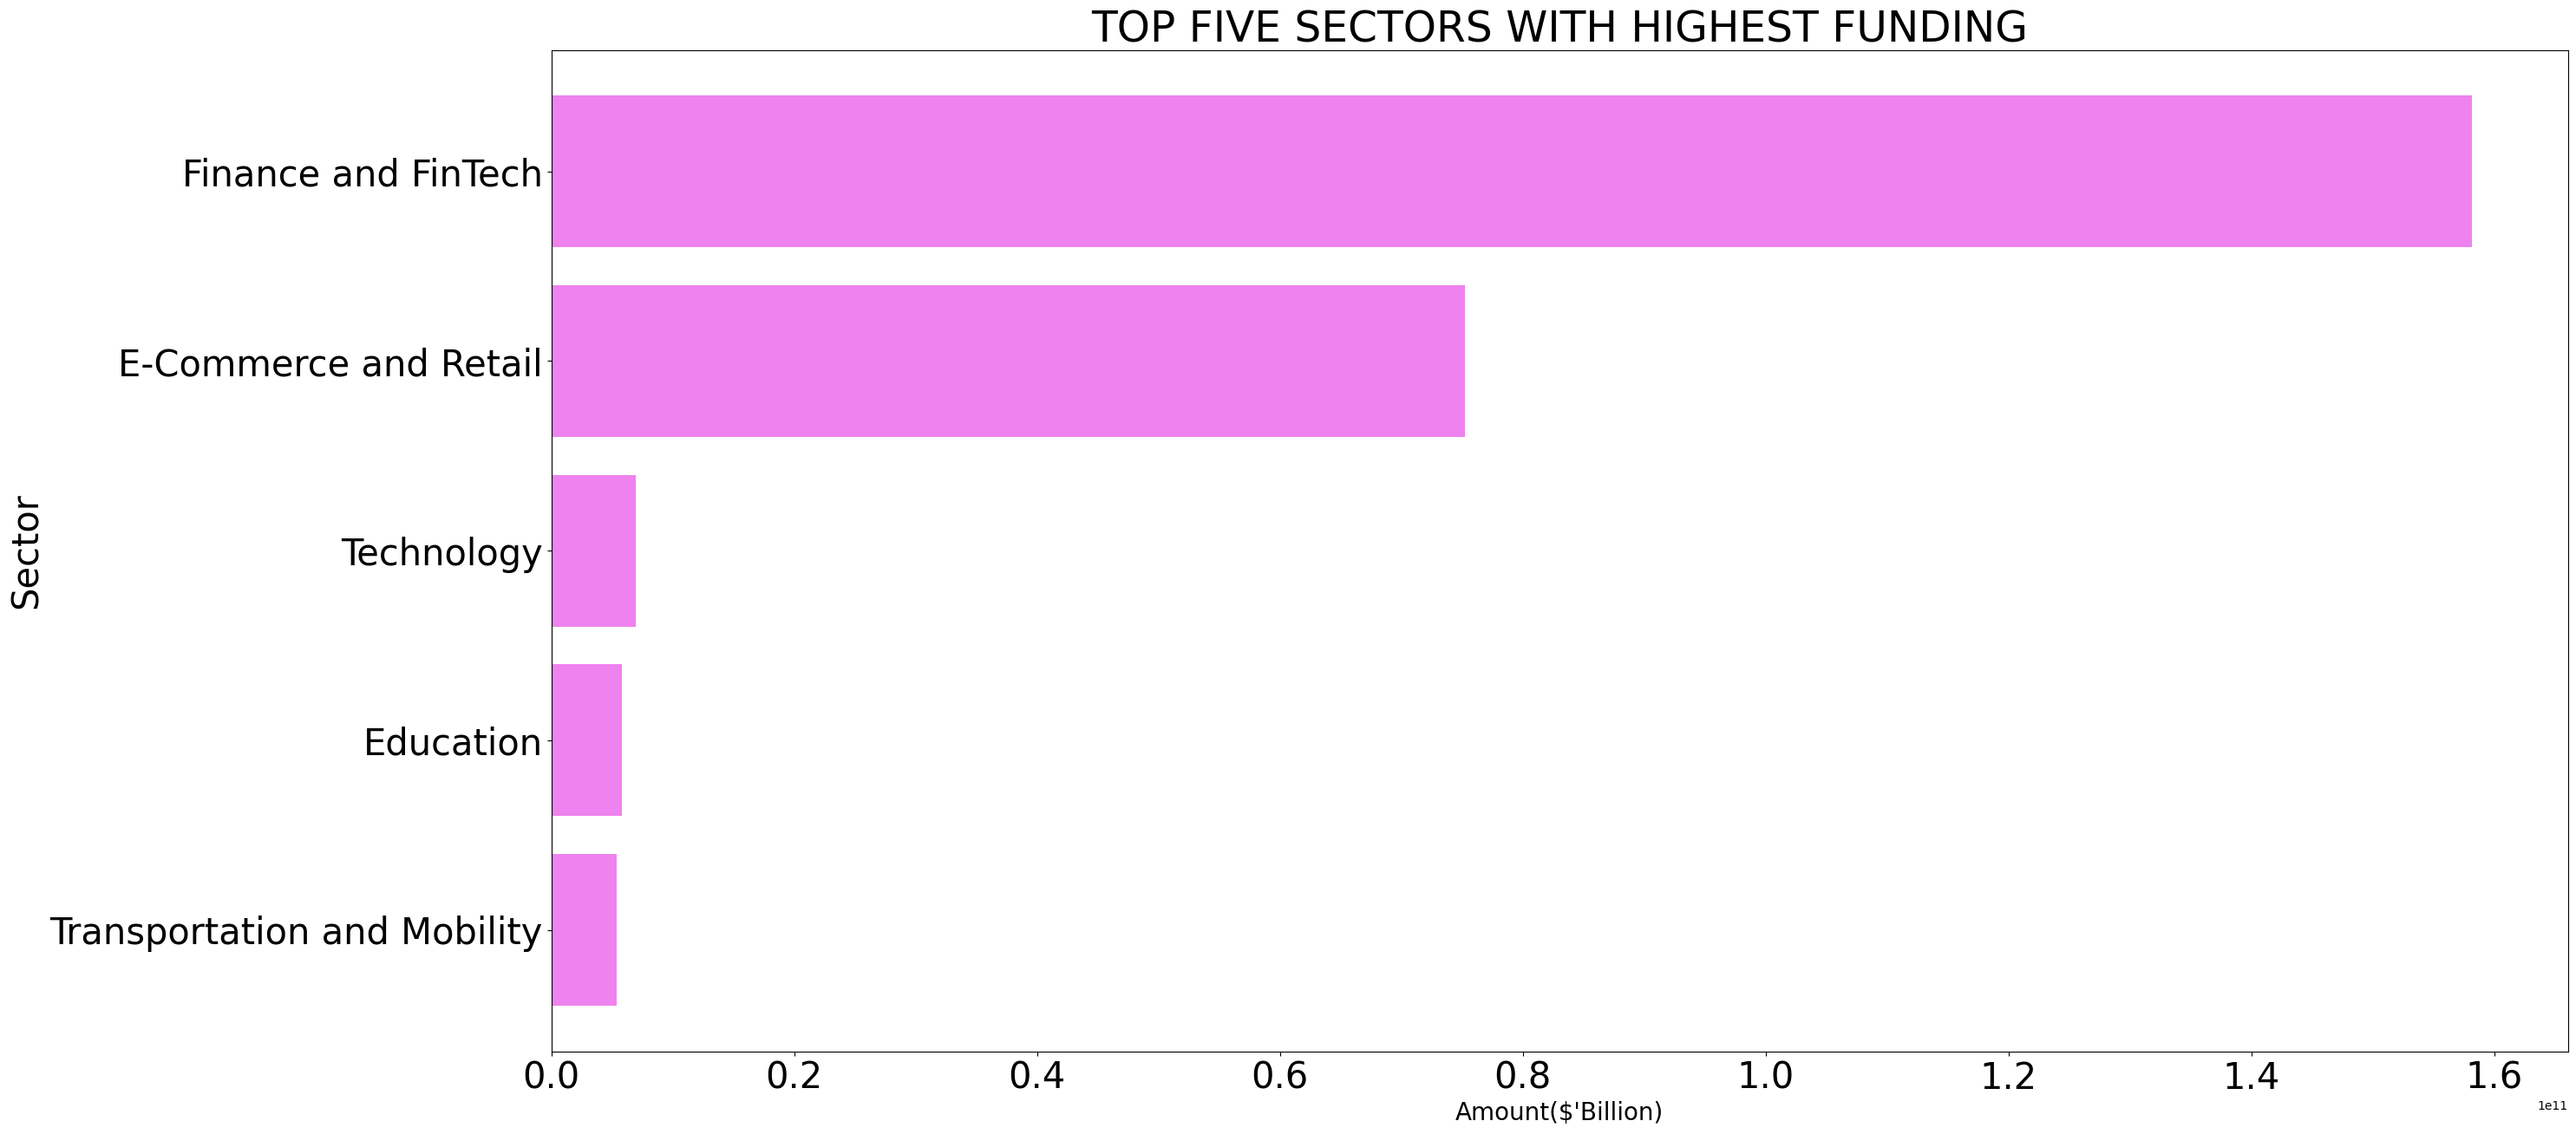

In [86]:
top_Sectors = data_combined.groupby("Sector")["Amount"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(30, 15))
plt.barh(top_Sectors.index, top_Sectors.values, color="violet")
plt.title("TOP FIVE SECTORS WITH HIGHEST FUNDING", fontsize=35)
plt.xlabel("Amount($'Billion)", fontsize=20)
plt.ylabel("Sector", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.gca().invert_yaxis()
plt.show()



### Q3.Which cities are the major hubs for start-ups in India?

In [87]:
# Remove Uknown from Location columns
data_combined= data_combined[data_combined["HeadQuarter"]!="Unknown"]

# Create Dataframe to show five(5) cities with most startups
top_five_cities = pd.DataFrame(data_combined["HeadQuarter"].value_counts().head())
top_five_cities

,count
HeadQuarter,
Bengaluru,914
Mumbai,466
Gurugram,238
New Delhi,230
Chennai,106


#### Plotting the top(5) cities with the most startups

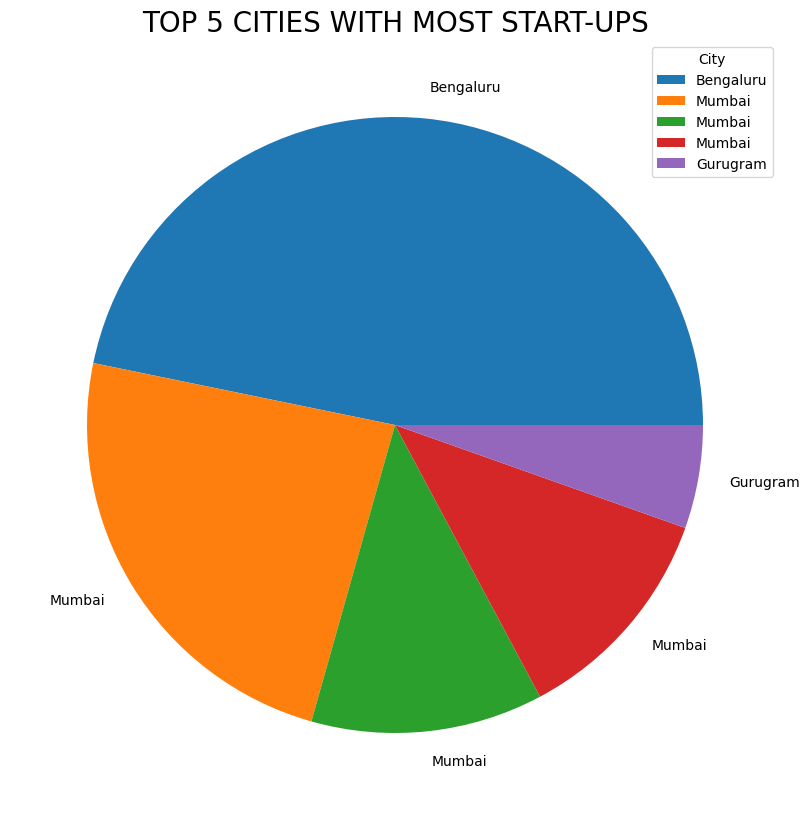

In [88]:
top_5_cities = data_combined['HeadQuarter'].value_counts().head() 

plt.figure(figsize=(15, 10))
plt.pie(top_5_cities, labels=data_combined["HeadQuarter"].head(), data=data_combined["HeadQuarter"].value_counts())
plt.title("TOP 5 CITIES WITH MOST START-UPS", fontsize=20)
plt.legend(title="City", loc="upper right")  # Add legend with title and position
plt.show()

## Q8. Which Cities received the highest funding

Here, we seek to know the cities that received the highest funding from investors.

In [89]:
import math

In [90]:
# Group by city and sum the funding amounts
city_funding = data_combined.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Sort the cities by total funding amount in descending order
city_funding = city_funding.sort_values(by='Amount', ascending=False)

# Take the top 5 most funded cities
top_5_cities = city_funding.head(5)

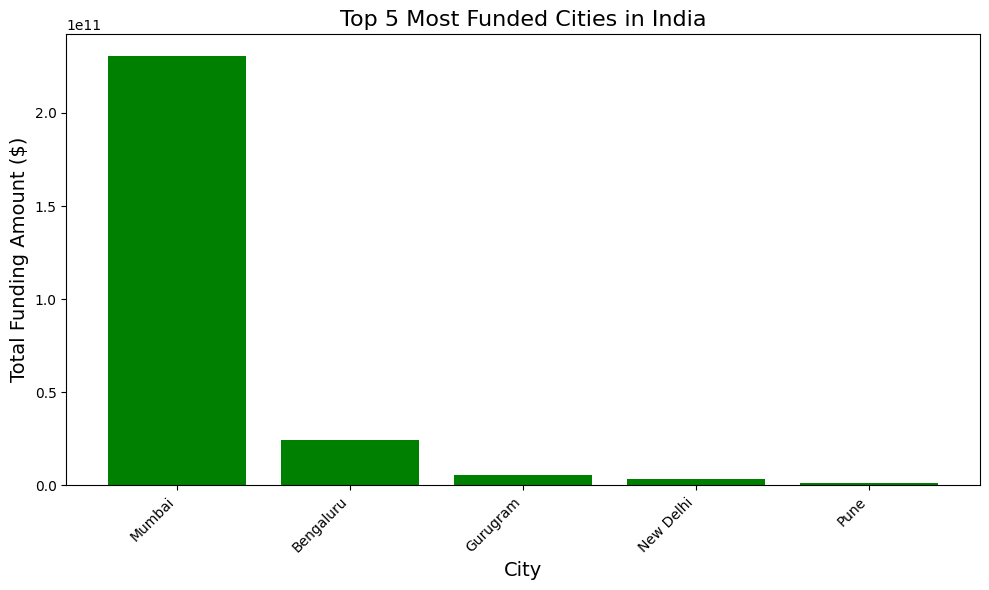

In [91]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['HeadQuarter'], top_5_cities['Amount'], color='green')
plt.title('Top 5 Most Funded Cities in India', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Q5.What are the most common funding stages among indian startups?

In [105]:
# Remove unknown from stage column for analysis
data_combined = data_combined[data_combined["Stage"] != "Undisclosed"]

funded_stage =data_combined.groupby(data_combined["Stage"])["Amount"].sum()
funded_stage = funded_stage.sort_values(ascending=False).reset_index().head(10)
funded_stage["Amount"] = funded_stage["Amount"].apply(lambda x: math.ceil(x))
funded_stage

,Stage,Amount
0,Debt Financing,150707112000
1,Series C,4751039700
2,Series D,3575781000
3,Series E,3433153000
4,Series B,3429304000
5,Series A,2688750500
6,Series H,2312500000
7,Private Equity,2063400000
8,Series F,1628200000
9,Seed Round,966349921


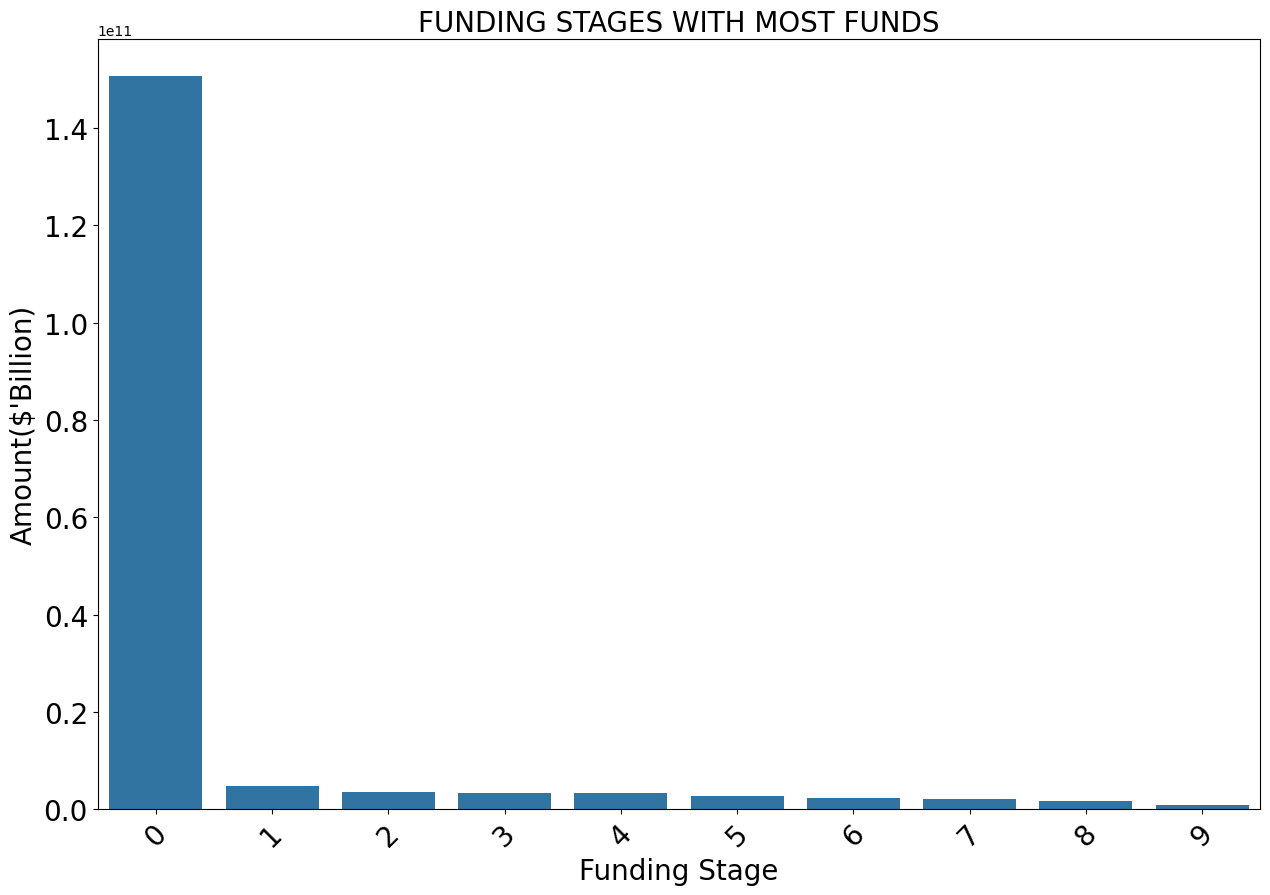

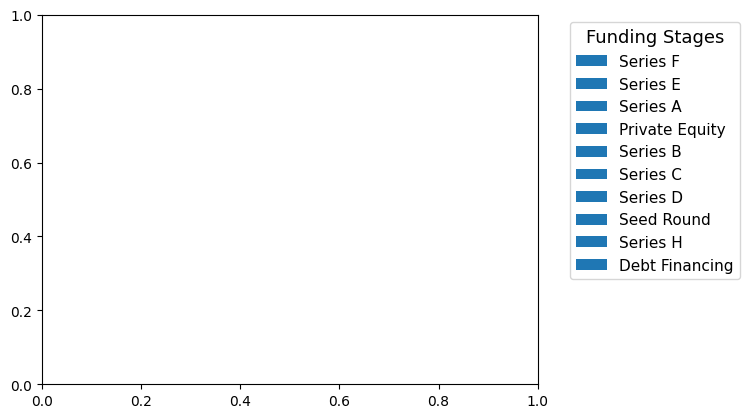

In [106]:
import matplotlib.patches as mpatches


plt.figure(figsize=(15, 10))

fundedstage = data_combined.groupby(data_combined["Stage"])["Amount"].sum().sort_values(ascending=False).head(10)

sns.barplot(fundedstage.values)
plt.title("FUNDING STAGES WITH MOST FUNDS", fontsize=20)
plt.xlabel("Funding Stage", fontsize=20)
plt.ylabel("Amount($'Billion)", fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

# Create a custom legend
handles = [mpatches.Patch(label=stage) for stage in top_10_stages['Stage']]
plt.legend(handles=handles, title='Funding Stages', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
